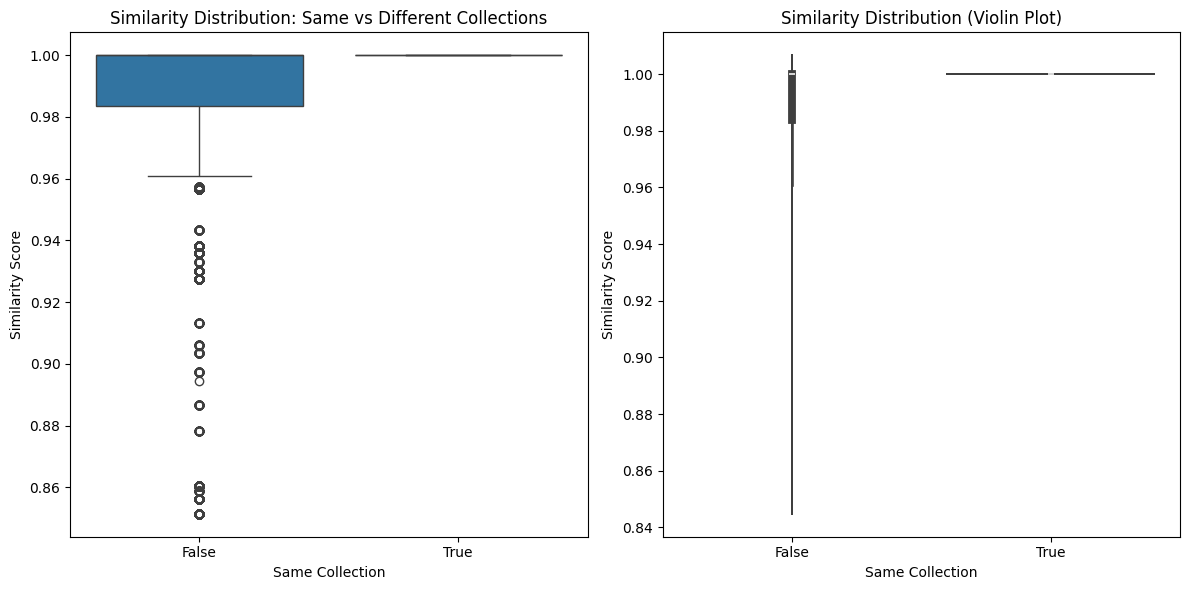


Similarity Statistics for Same Collection Products:
count    6.000000e+00
mean     1.000000e+00
std      1.719950e-16
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: similarity, dtype: float64

Similarity Statistics for Different Collection Products:
count    26592.000000
mean         0.987462
std          0.025415
min          0.851439
25%          0.983626
50%          1.000000
75%          1.000000
max          1.000000
Name: similarity, dtype: float64

Average Similarity by Collection:
             mean  count  std
collection1                  
Care          1.0      6  0.0

Data Summary:
Total number of product pairs: 26598
Number of same collection pairs: 6
Number of different collection pairs: 26592

Mann-Whitney U test p-value: 0.03546451274149658994
(Tests if same-collection similarities are significantly higher than different-collection similarities)


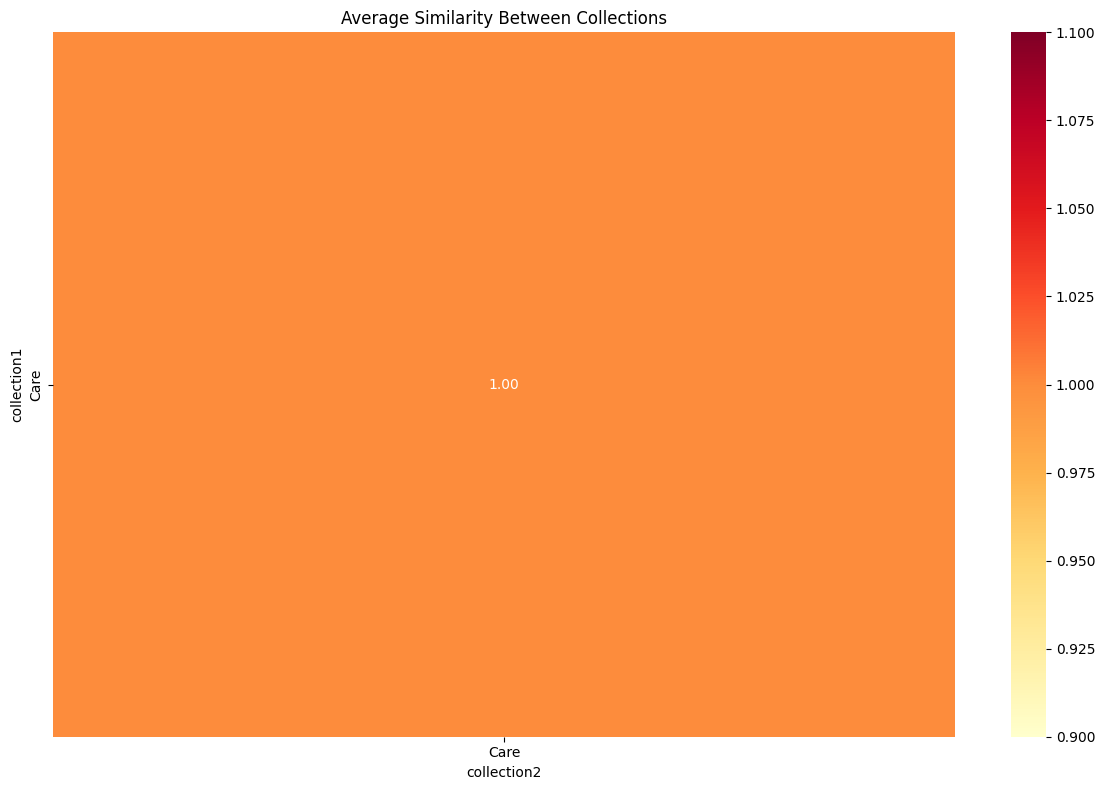

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data
products_tfidf = pd.read_csv("c:/Users/Administrator/NappsRecommenderSystem/products_with_tfidf.csv")
similar_products = pd.read_csv("c:/Users/Administrator/NappsRecommenderSystem/products_similar_products.csv")

# Add collection information to similarity data
product_collections = dict(zip(products_tfidf['product_title'], products_tfidf['collection_title']))
similar_products['collection1'] = similar_products['product1'].map(product_collections)
similar_products['collection2'] = similar_products['product2'].map(product_collections)

# Mark if products are from same collection
similar_products['same_collection'] = similar_products['collection1'] == similar_products['collection2']

# Create visualizations
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(x='same_collection', y='similarity', data=similar_products)
plt.title('Similarity Distribution: Same vs Different Collections')
plt.xlabel('Same Collection')
plt.ylabel('Similarity Score')

# Violin plot for more detailed distribution
plt.subplot(1, 2, 2)
sns.violinplot(x='same_collection', y='similarity', data=similar_products)
plt.title('Similarity Distribution (Violin Plot)')
plt.xlabel('Same Collection')
plt.ylabel('Similarity Score')

plt.tight_layout()
plt.show()

# Print statistics
print("\nSimilarity Statistics for Same Collection Products:")
print(similar_products[similar_products['same_collection']]['similarity'].describe())
print("\nSimilarity Statistics for Different Collection Products:")
print(similar_products[~similar_products['same_collection']]['similarity'].describe())

# Average similarity by collection
collection_similarities = similar_products[similar_products['same_collection']].groupby('collection1')['similarity'].agg(['mean', 'count', 'std']).round(3)
collection_similarities = collection_similarities.sort_values('mean', ascending=False)

print("\nAverage Similarity by Collection:")
print(collection_similarities)

# Data Summary
print("\nData Summary:")
print(f"Total number of product pairs: {len(similar_products)}")

# Statistical test (Mann-Whitney U test)
same_collection = similar_products[similar_products['same_collection']]['similarity']
diff_collection = similar_products[~similar_products['same_collection']]['similarity']

print(f"Number of same collection pairs: {len(same_collection)}")
print(f"Number of different collection pairs: {len(diff_collection)}")

if len(same_collection) > 0 and len(diff_collection) > 0:
    statistic, p_value = stats.mannwhitneyu(same_collection, diff_collection, alternative='greater')
    print(f"\nMann-Whitney U test p-value: {p_value:.20f}")  # Changed from 10 to 20 decimal places
    print("(Tests if same-collection similarities are significantly higher than different-collection similarities)")
    
else:
    print("\nNot enough data to perform statistical test")

# Additional visualization: Collection pair heatmap
plt.figure(figsize=(12, 8))
collection_matrix = pd.pivot_table(
    similar_products,
    values='similarity',
    index='collection1',
    columns='collection2',
    aggfunc='mean'
)

sns.heatmap(collection_matrix, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Average Similarity Between Collections')
plt.tight_layout()
plt.show()